<a href="https://colab.research.google.com/github/oushnik23/Sentiment-Analysis/blob/main/Airlines_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
tweet=pd.read_csv("Tweets.csv")

In [23]:
nrows,ncols=tweet.shape

In [24]:
print(f"there are {nrows} rows and {ncols} columns in this dataset")

there are 14640 rows and 15 columns in this dataset


In [25]:
tweet.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [26]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [27]:
tweet.isnull().any()

tweet_id                        False
airline_sentiment               False
airline_sentiment_confidence    False
negativereason                   True
negativereason_confidence        True
airline                         False
airline_sentiment_gold           True
name                            False
negativereason_gold              True
retweet_count                   False
text                            False
tweet_coord                      True
tweet_created                   False
tweet_location                   True
user_timezone                    True
dtype: bool

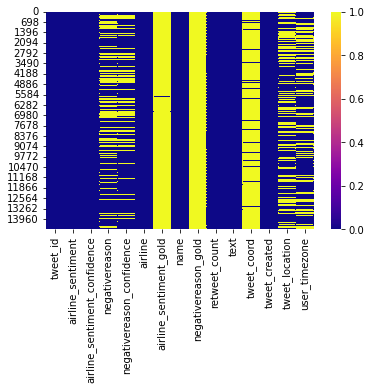

In [28]:
sns.heatmap(tweet.isnull(),cmap='plasma')

In [29]:
tweet['negativereason']=tweet['negativereason'].fillna('No review')

<Figure size 720x864 with 0 Axes>

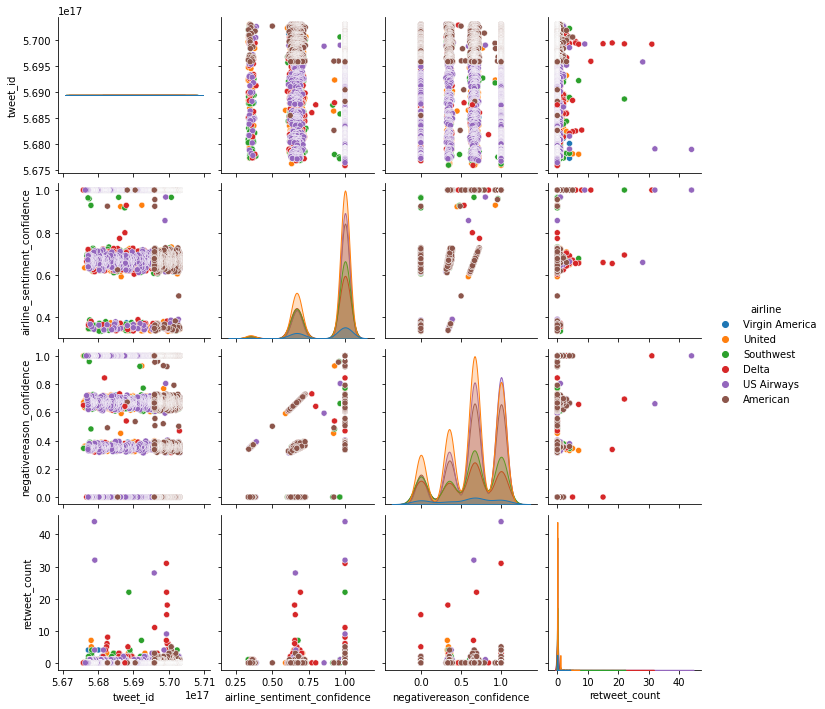

In [30]:
fig=plt.figure(figsize=(10,12))
sns.pairplot(hue='airline',data=tweet)

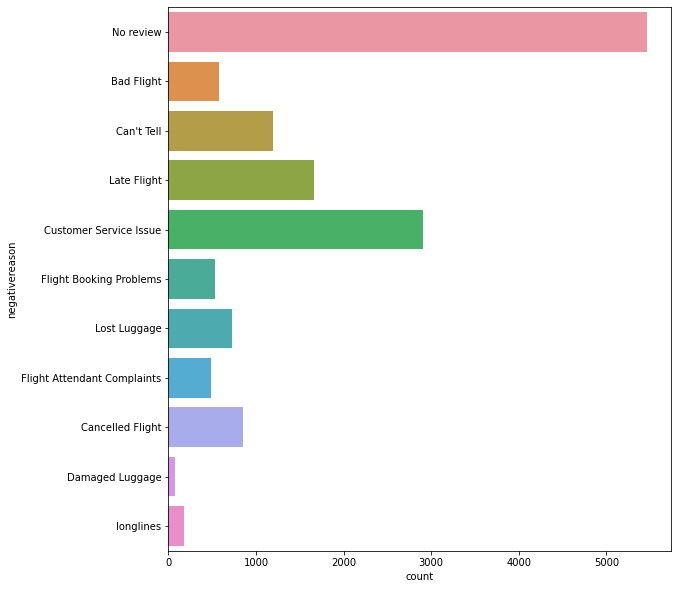

In [31]:
fig=plt.figure(figsize=(9,10))
sns.countplot(data=tweet,y='negativereason')

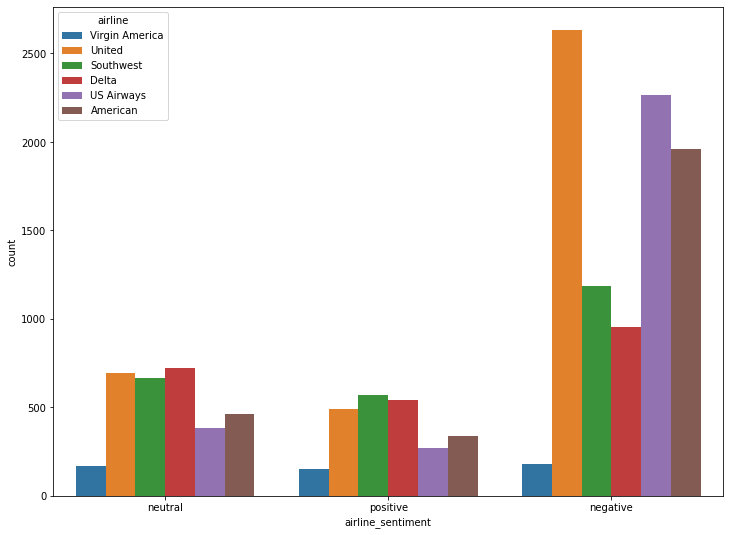

In [32]:
fig=plt.figure(figsize=(12,9))
sns.countplot(data=tweet,x='airline_sentiment',hue='airline')

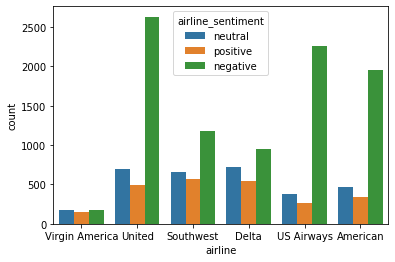

In [33]:
sns.countplot(data=tweet,x='airline',hue='airline_sentiment')

In [34]:
tweet['negativereason'].apply(type)

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
14635    <class 'str'>
14636    <class 'str'>
14637    <class 'str'>
14638    <class 'str'>
14639    <class 'str'>
Name: negativereason, Length: 14640, dtype: object

In [35]:
tweet['negativereason_confidence'].unique()

array([   nan, 0.    , 0.7033, ..., 0.6234, 0.644 , 0.7255])

In [36]:
tweet['negativereason_confidence']=tweet['negativereason_confidence'].fillna(tweet['negativereason_confidence'].mean())

In [37]:
tweet['airline_sentiment_gold'].value_counts()

negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64

In [38]:
tweet['text'].apply(len).idxmax()

10405

In [39]:
tweet['length']=tweet['text'].apply(len)

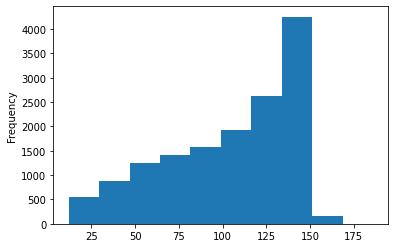

In [40]:
tweet['length'].plot.hist()

In [41]:
tweet['length'].max()

186

In [42]:
tweet[tweet['length']==186]['text'].iloc[0]

"@USAirways Eyyyy! Cancelled Flightlations, Flight Booking Problemss, reFlight Booking Problemss, but y'all got me on the same flight out tonight (not tomorrow) &amp; the FC upgrade. Thx!"

In [49]:
tweet[tweet.airline_sentiment=='positive']['length']

1         72
6         79
8         47
9         80
11        83
        ... 
14623    136
14625    106
14628    118
14630     27
14635     63
Name: length, Length: 2363, dtype: int64

In [50]:
tweet[tweet.length==136]['text'].iloc[0]

'@VirginAmerica I &lt;3 Flying VA But Life happens and I am trying to #change my trip JPERHI  Can you help.VA home page will not let me ?'

In [54]:
tweet[tweet.airline_sentiment=='neutral']['length'].max()

167

In [55]:
tweet[tweet.length==167]['text'].iloc[0]

'@JetBlue Hey guys! Your Flight Booking Problems system ran my first and middle names together at time of Flight Booking Problems. Is that going to be a #TSAnightmare ?'

In [56]:
pd.DataFrame(tweet[['airline_sentiment','tweet_location','airline']])

,airline_sentiment,tweet_location,airline
0,neutral,NaN,Virgin America
1,positive,NaN,Virgin America
2,neutral,Lets Play,Virgin America
3,negative,NaN,Virgin America
4,negative,NaN,Virgin America
...,...,...,...
14635,positive,NaN,American
14636,negative,Texas,American
14637,neutral,"Nigeria,lagos",American
14638,negative,New Jersey,American


In [57]:
data=tweet[['text','airline_sentiment']]

In [58]:
x=data['text']
y=data['airline_sentiment']

In [59]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=100)

**TO CONVERT A COLLECTION OF RAW DOCUMENTS TO A MATRIX OF TF-IDF FEATURES**

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(stop_words='english')
tfid.fit(xtrain)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [61]:
xtrain_tf=tfid.transform(xtrain)
xtest_tf=tfid.transform(xtest)

In [62]:
xtrain_tf

<11712x12980 sparse matrix of type '<class 'numpy.float64'>'
	with 107270 stored elements in Compressed Sparse Row format>

In [63]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter = 1000)
lr_model.fit(xtrain_tf,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
y_pred=lr_model.predict(xtest_tf)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

    negative       0.81      0.94      0.87      1863
     neutral       0.66      0.45      0.53       598
    positive       0.78      0.63      0.70       467

    accuracy                           0.79      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.78      0.79      0.77      2928



In [67]:
confusion_matrix(ytest,y_pred)

array([[1745,   83,   35],
       [ 285,  268,   45],
       [ 120,   55,  292]])

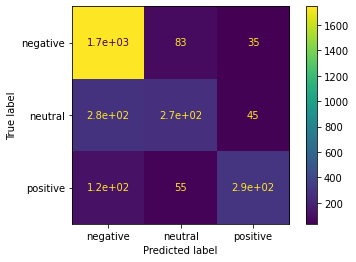

In [70]:
plot_confusion_matrix(lr_model,xtest_tf,ytest)

In [71]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(xtrain_tf,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [72]:
y_pred2=nb.predict(xtest_tf)

In [73]:
print(classification_report(ytest,y_pred2))

              precision    recall  f1-score   support

    negative       0.68      0.99      0.81      1863
     neutral       0.76      0.14      0.23       598
    positive       0.88      0.16      0.28       467

    accuracy                           0.69      2928
   macro avg       0.77      0.43      0.44      2928
weighted avg       0.73      0.69      0.60      2928



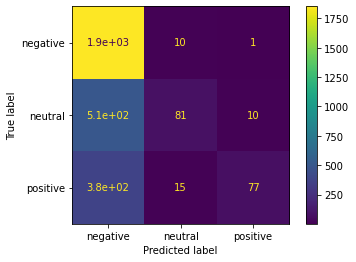

In [74]:
plot_confusion_matrix(nb,xtest_tf,ytest)

In [76]:
from sklearn.pipeline import Pipeline

In [77]:
pipe=Pipeline([('tfid',TfidfVectorizer()),('lr_model',LogisticRegression())])

In [78]:
pipe.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('tfid',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lr_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sca

In [79]:
pipe.predict(['Ok flight'])

array(['neutral'], dtype=object)